<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/12_Exercise_4_Multi_class_classifier_Question_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from google.colab import files
import os
import zipfile
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
dataset = f'/content/drive/MyDrive/Colab Notebooks/DeepLearning.AI TensorFlow Developer/data/sign_mnist.zip'
shutil.rmtree('/tmp')

local_zip = dataset
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
def get_data(filename) :

  with open(filename) as training_file :
    read = csv.reader(training_file, delimiter = ',')
    first_line = True
    temp_images = []
    temp_labels = []

    for row in read :
      if first_line : 
        first_line = False
      else :
        temp_labels.append(row[0])
        images_data = row[1:785]
        as_array = np.array_split(images_data, 28)
        temp_images.append(as_array)

    images = np.array(temp_images).astype('float')
    labels = np.array(temp_labels).astype('float')

  return images, labels

In [12]:
path_sign_mnist_train = f"/tmp/sign_mnist_train.csv"
path_sign_mnist_test = f"/tmp/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size = 32
    )
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size = 32
)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [19]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(.1),
      tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(25, activation = 'softmax')
])
      
model.summary()
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>0.999):
            print('\n Reached 99.9% accuracy!')
            self.model.stop_training=True

callbacks = myCallback()

In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)/2,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)/2,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/20
 11/429 [..............................] - ETA: 4s - loss: 0.7712 - acc: 0.7670

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


429/429 [==============================] - 5s 11ms/step - loss: 0.7550 - acc: 0.7544 - val_loss: 0.3646 - val_acc: 0.8836
Epoch 2/20
429/429 [==============================] - 5s 11ms/step - loss: 0.7272 - acc: 0.7593 - val_loss: 0.4367 - val_acc: 0.8446
Epoch 3/20
429/429 [==============================] - 5s 11ms/step - loss: 0.6756 - acc: 0.7740 - val_loss: 0.3262 - val_acc: 0.8872
Epoch 4/20
429/429 [==============================] - 5s 12ms/step - loss: 0.6476 - acc: 0.7904 - val_loss: 0.2213 - val_acc: 0.9237
Epoch 5/20
429/429 [==============================] - 5s 12ms/step - loss: 0.6092 - acc: 0.7994 - val_loss: 0.2178 - val_acc: 0.9179
Epoch 6/20
429/429 [==============================] - 5s 12ms/step - loss: 0.5809 - acc: 0.8119 - val_loss: 0.2245 - val_acc: 0.9226
Epoch 7/20
429/429 [==============================] - 5s 12ms/step - loss: 0.5666 - acc: 0.8155 - val_loss: 0.2009 - val_acc: 0.9347
Epoch 8/20
429/429 [==============================] - 5s 11ms/step - loss: 0.531

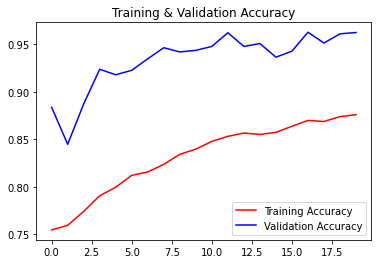

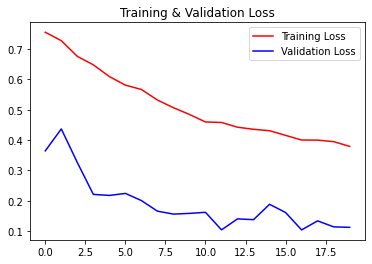

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()